## Imports

In [2]:
import torch
from torch import nn ## nn contains all of PyTorch's building blocks
import matplotlib.pyplot as plt

#check PyTorch version
torch.__version__

'2.0.1'

## 01. PyTorch Workflow Fundamentals

Let's explore an example PyTorch end-toend workflow

In [3]:
what_we_re_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_we_re_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

### 1. Data (Preparing and Loading)

Machine Learning is a game of **two parts**:
1. **Get data** into a **numerical representation**.
2. **Build a model** to **learn patterns** from that **numerical representation**.
   
![](imgs/machine-learning-2-parts.png){ width=50%}

In [4]:
# create known parameters
weight = 0.7
bias = 0.3

# create new values
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

#### Splitting a data

- Training, validation, and test set
- we usually do 60-80% split for training data
- 10-20% for validation set
- 10-20% for test set

In [6]:
# create train-test split

cutoff = int(len(X) * 0.8)

X_train, y_train = X[:cutoff], y[:cutoff]
X_test, y_test = X[cutoff:], y[cutoff:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

#### Visualize data

How might we better visualize our data?

This is where the data explorer's motto comes in!

***"Visualize, Visualize, Visualize"***

In [7]:
def plot_predictions(train_data=X_train, train_labels = y_train, test_data = X_test, test_labels = y_test,predictions=None):
    """
    Plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10,7))

    # plot training data in blue, c='b', size 5, s=4
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')

    # plot testing data in green c='g'
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing Data')

    # are there predictions?
    if predictions is not None:
        # plot predictions if exist, c='r'
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    # show the lagend
    plt.legend(prop={"size":14})


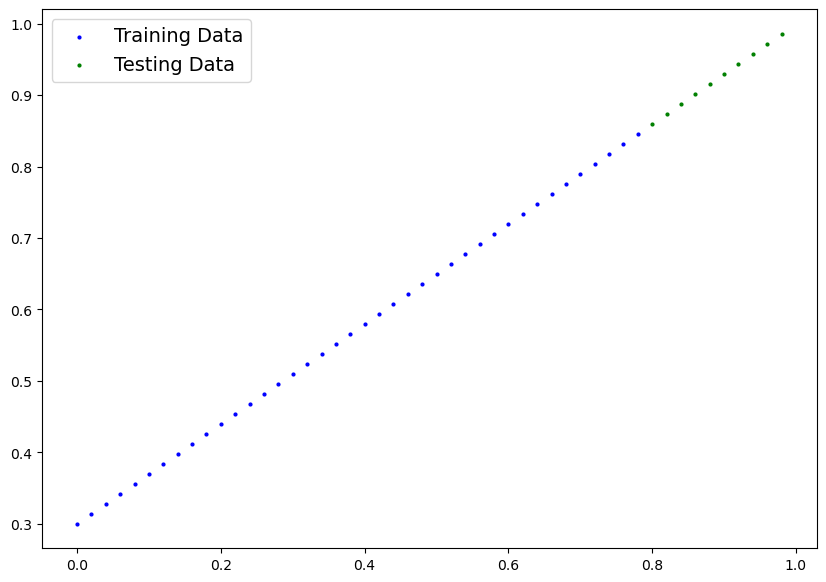

In [8]:
plot_predictions()

### 2. Build Model

Our First PyTorch Model!!

In [18]:
from torch import nn

# create linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )
        self.bias = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )

        
    # Forard method to define the computation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [19]:
nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

Parameter containing:
tensor([0.0816], requires_grad=True)

`nn.Module` is the superclass, and when we do `LinearRegressionModule(nn.Module`, we create a subclass of nn.Module

When we subclass `nn.Module` we have to override `forward()` method - as this defines the forward computation of the model

`required_autograd = True` means PyTorch will keep track gradient of that particular parameter to be used with `torch.autograd` and gradient descent torch.nn modules.

`required_autograd` is `True` by default

#### PyTorch model Building Essentials
**Some of the most important PyTorch model building classes**

* `torch.nn` - contains all the building blocks for a computational graphs (a neural network is considered a computational graph)
* `torch.nn.Parameter` - what papameters should our model try and learn. Often a PyTorch layer from `torch.nn` will set these for us.
* `torch.nn.Module` - the base class for all neural network modules. If you subclass it, you should override `forward()` method
* `torch.optim` - this is where optimizers in PyTorch live. It helps with gradient descent
* `def forward()` - All the `nn.Module` subclasses require us to override forward(). This method defines what happens in the forward computation.

if we pass the data to our `LinearRegressionModel`, `forward()` will take that data and perform the computation defined inside `forward()`

**Help us load data**
* `torch.utils.data.Dataset`
* `torch.utils.data.DataLoader`

PyTorch is a big library.
Follow this [PyTorch CheatSeat](https://pytorch.org/tutorials/beginner/ptcheat.html) for more.

#### Checking out Internals of our PyTorch Model

Now we've created a model, let's see what's inside our model

So we can chek our model paraters or what's inside our model using `.parameters()`

In [22]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model
model_0 = LinearRegressionModel()

# check our the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [23]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### Making Predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the `forward()` method

In [26]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

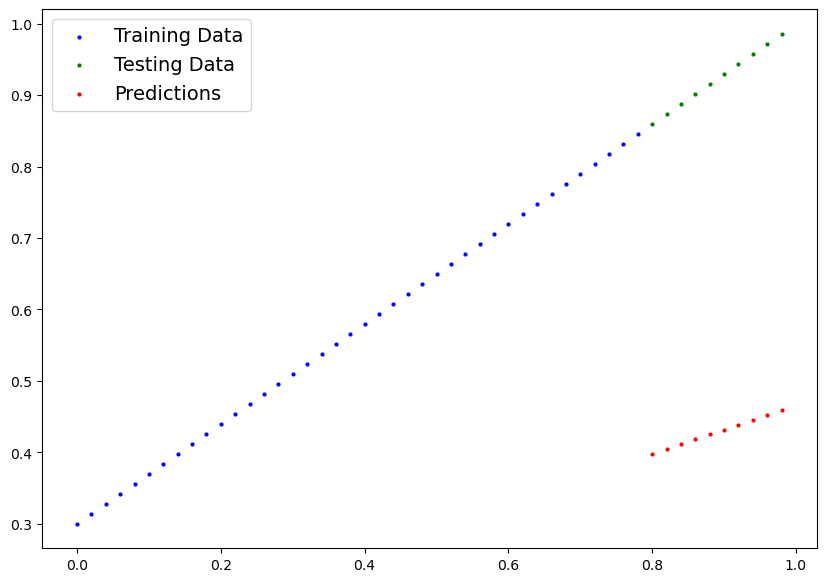

In [27]:
plot_predictions(predictions=y_preds)

Our `goal` is to move that `red dot` closer to the `green dots`

### 3. Train Model

The whole idea of training is for a model to move from some unknown parameters to some known parameters.

or in other words, `from` a `poor representation` of the data `to` a `better representation` of the data

One way to measure how poor or how wrong our models are is by calculating `loss function`

* Note: Loss function is also called `cost function` or `criterion` in different areas. For our case, we're going to refer to it as `loss function`

***Things we need for Training***:
* **Loss Function:** A function to measure how deviated our models prediction are from the ideal outputs. lower the deviation, better it it.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters(e.g. weights and biases)

**and specifically for `PyTorch`, we need**
* **A training loop**
* **A testing loop**
  

In [29]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [30]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### Setting up a loss function and an optimizer